In [1]:
import pandas as pd

df = pd.read_csv('../data/schemaAgnosticSyntacticWeightsResults.csv', sep='|')
df

,Dataset,Representation Model,Similarity Metric,Duplicates Type,Domain,Valid Pairs,Average Characters D1,Average Tokens D1,Average Characters D2,Average Tokens D2,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,CHARACTER_BIGRAMS,COSINE_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.988764,0.871287,0.90,81,0.771930,0.988764,0.866995,0.90,21,Right
1,Restaurants,CHARACTER_BIGRAMS,ENHANCED_JACCARD_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.932584,0.817734,0.70,119,0.370833,1.000000,0.541033,0.65,40,Right
2,Restaurants,CHARACTER_BIGRAMS,GENERALIZED_JACCARD_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.966292,0.847291,0.80,47,0.786667,0.662921,0.719512,0.90,9,Right
3,Restaurants,CHARACTER_BIGRAMS_TF_IDF,ARCS_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.898876,0.780488,0.45,41,0.689655,0.898876,0.780488,0.45,9,Right
4,Restaurants,CHARACTER_BIGRAMS_TF_IDF,COSINE_SIMILARITY,Scarce,Restaurants,764784,107,21,111,21,...,0.988764,0.567742,0.60,32,0.377880,0.921348,0.535948,0.70,8,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,Movies,TOKEN_BIGRAM_GRAPHS,GRAPH_VALUE_SIMILARITY,Balanced,Movies,20926,95,15,547,127,...,0.221187,0.357373,0.05,62,0.886909,0.226392,0.360709,0.05,52,Right
437,Movies,TOKEN_TRIGRAMS,COSINE_SIMILARITY,Balanced,Movies,1308919,95,15,547,127,...,0.221537,0.347668,0.05,826,0.620193,0.235621,0.341501,0.05,884,Right
438,Movies,TOKEN_TRIGRAMS_TF_IDF,ARCS_SIMILARITY,Balanced,Movies,1308919,95,15,547,127,...,0.240432,0.383949,0.05,181,0.952151,0.241088,0.384755,0.05,64,Right
439,Movies,TOKEN_TRIGRAMS_TF_IDF,COSINE_SIMILARITY,Balanced,Movies,775767,95,15,547,127,...,0.241132,0.372349,0.05,214,0.665060,0.253423,0.366999,0.05,108,Right


In [2]:
thresholds = pd.DataFrame()
thresholds['Dataset'] = df['Dataset']

for column in df:
    if (0 < column.find('Threshold')):
            thresholds[column] = df[column]
            
thresholds.columns = ['Dataset', 'CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
thresholds.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,441.000,441.000,441.000,441.000,441.000,441.000,441.000,441.000
mean,0.409,0.406,0.307,0.297,0.327,0.291,0.272,0.297
std,0.226,0.244,0.238,0.241,0.242,0.231,0.241,0.248
min,0.050,0.050,0.050,0.050,0.050,0.050,0.050,0.050
25%,0.200,0.200,0.100,0.050,0.100,0.100,0.050,0.050
50%,0.400,0.400,0.250,0.250,0.300,0.250,0.200,0.200
75%,0.600,0.600,0.500,0.450,0.500,0.450,0.450,0.500
max,0.950,0.950,0.950,0.950,0.950,0.900,0.900,0.950


In [4]:
corr = thresholds.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
CNC,1.00,0.94,0.84,0.81,0.87,0.86,0.81,0.82
RSR,0.94,1.00,0.92,0.89,0.94,0.91,0.89,0.91
RCA,0.84,0.92,1.00,0.94,0.96,0.93,0.95,0.97
BAH,0.81,0.89,0.94,1.00,0.94,0.91,0.92,0.95
BMC,0.87,0.94,0.96,0.94,1.00,0.94,0.95,0.97
EXC,0.86,0.91,0.93,0.91,0.94,1.00,0.94,0.95
KRC,0.81,0.89,0.95,0.92,0.95,0.94,1.00,0.97
UMC,0.82,0.91,0.97,0.95,0.97,0.95,0.97,1.00


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

Text(0.5, 1.0, 'Schema-Agnostic Syntactic Weights')

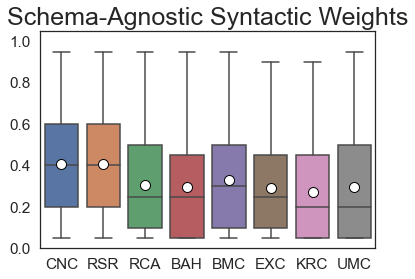

In [6]:
ax = sns.boxplot(data = thresholds,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
ax.set(ylim=(0.0, 1.05))
ax.set_title("Schema-Agnostic Syntactic Weights", fontsize = 25)
# plt.savefig('sasyThr.eps', format='eps')

In [7]:
datasets = ['Restaurants', 'Abt-Buy', 'Amazon-Google Products', 'DBLP-ACM', 'IMDB-TMDB', 
            'IMDB-TVDB', 'TMDB-TVDB', 'Walmart-Amazon', 'DBLP-Scholar', 'Movies']

Text(0.5, 1.0, 'Schema-Agnostic Syntactic Weights')

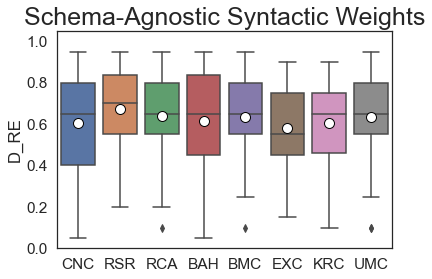

In [8]:
dataset_df = thresholds[thresholds['Dataset']==datasets[0]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_RE')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Agnostic Syntactic Weights", fontsize = 25)
# plt.savefig('sasyD1.eps', format='eps')

[(0.0, 1.0)]

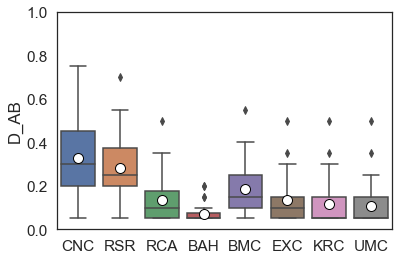

In [9]:
dataset_df = thresholds[thresholds['Dataset']==datasets[1]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AB')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD2.eps', format='eps')

[(0.0, 1.0)]

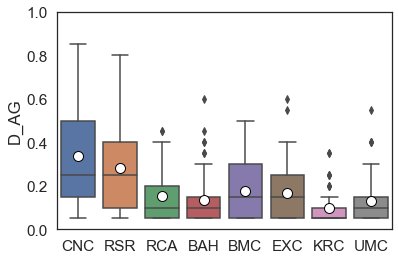

In [10]:
dataset_df = thresholds[thresholds['Dataset']==datasets[2]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AG')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD3.eps', format='eps')

[(0.0, 1.0)]

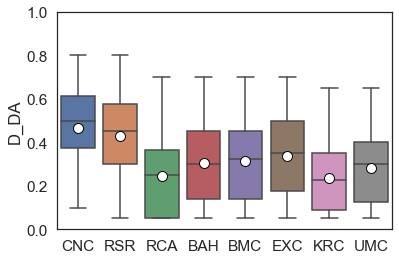

In [11]:
dataset_df = thresholds[thresholds['Dataset']==datasets[3]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DA')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD4.eps', format='eps')

[(0.0, 1.0)]

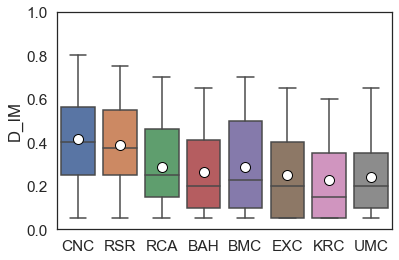

In [12]:
dataset_df = thresholds[thresholds['Dataset']==datasets[4]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IM')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD5.eps', format='eps')

Text(0.5, 1.0, 'Schema-Agnostic Syntactic Weights')

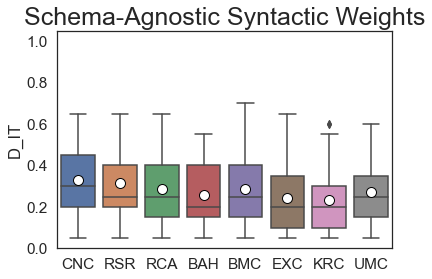

In [13]:
dataset_df = thresholds[thresholds['Dataset']==datasets[5]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IT')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Agnostic Syntactic Weights", fontsize = 25)
# plt.savefig('sasyD6.eps', format='eps')

[(0.0, 1.0)]

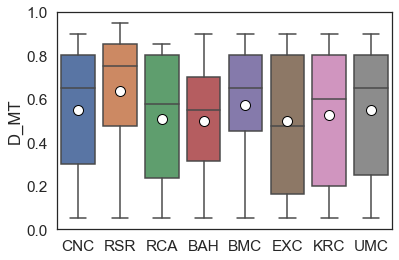

In [14]:
dataset_df = thresholds[thresholds['Dataset']==datasets[6]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_MT')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD7.eps', format='eps')

[(0.0, 1.0)]

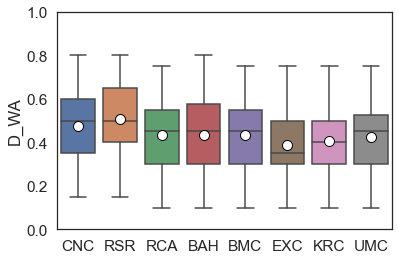

In [15]:
dataset_df = thresholds[thresholds['Dataset']==datasets[7]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_WA')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD8.eps', format='eps')

[(0.0, 1.0)]

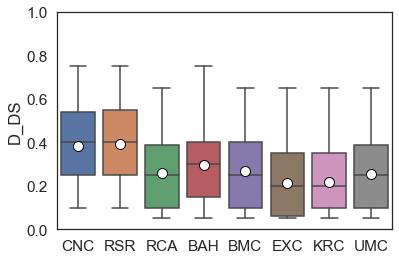

In [16]:
dataset_df = thresholds[thresholds['Dataset']==datasets[8]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DS')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD9.eps', format='eps')

[(0.0, 1.0)]

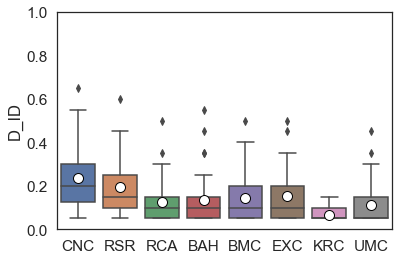

In [17]:
dataset_df = thresholds[thresholds['Dataset']==datasets[9]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_ID')
p.set(ylim=(0.0, 1.0))
# plt.savefig('sasyD10.eps', format='eps')